# Exploracion de datos usando el dataset Reporte Lesiones Personales

## Integrantes
- Omar Alejandro Izquierdo Berrio
- German Ricardo Orozco Villarreal
- Tania Alexandra Florez Ramos
- Luis Manuel Roqueme
- Fary Leonardo Urriaga Causil
- Miguel Sebastián Nisperuza Sierra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import locale
locale.setlocale(locale.LC_ALL, 'es_CO.utf8')

'es_CO.utf8'

In [2]:
data = pd.read_csv("Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv", low_memory=False)

In [3]:
data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,3/05/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,16/06/2022,FEMENINO,ADOLESCENTES,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,17/04/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,30/03/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   DEPARTAMENTO          1047249 non-null  object
 1   MUNICIPIO             1047249 non-null  object
 2   CODIGO DANE           1047249 non-null  object
 3   ARMAS MEDIOS          1047249 non-null  object
 4   FECHA HECHO           1047249 non-null  object
 5   GENERO                1047249 non-null  object
 6   GRUPO ETARIO          1046285 non-null  object
 7   DESCRIPCIÓN CONDUCTA  1047249 non-null  object
 8   CANTIDAD              1047249 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 569.9 MB


In [5]:
# Buscamos los valores nulos
data.isnull().sum()

DEPARTAMENTO              0
MUNICIPIO                 0
CODIGO DANE               0
ARMAS MEDIOS              0
FECHA HECHO               0
GENERO                    0
GRUPO ETARIO            964
DESCRIPCIÓN CONDUCTA      0
CANTIDAD                  0
dtype: int64

In [6]:
# Tenemos 964 datos nulos en la columna "GRUPO ETARIO"
# Eliminamos las columnas que no nos sirven, como son pocos datos, no afecta a la muestra
data_cleaned = data.copy().dropna()
data_cleaned

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,3/05/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,16/06/2022,FEMENINO,ADOLESCENTES,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,17/04/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,30/03/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1


In [7]:
# Eliminamos las columnas que no nos interesan
# CODIGO DANE, GENERO
data_cleaned.drop(['CODIGO DANE', 'GENERO'], axis=1, inplace=True)

In [8]:
# Cambuiamos el formato de la fecha
data_cleaned['FECHA HECHO'] = pd.to_datetime(data_cleaned["FECHA HECHO"], format="%d/%m/%Y")
# Asignamos la fecha como índice
data_cleaned.index = data_cleaned['FECHA HECHO']

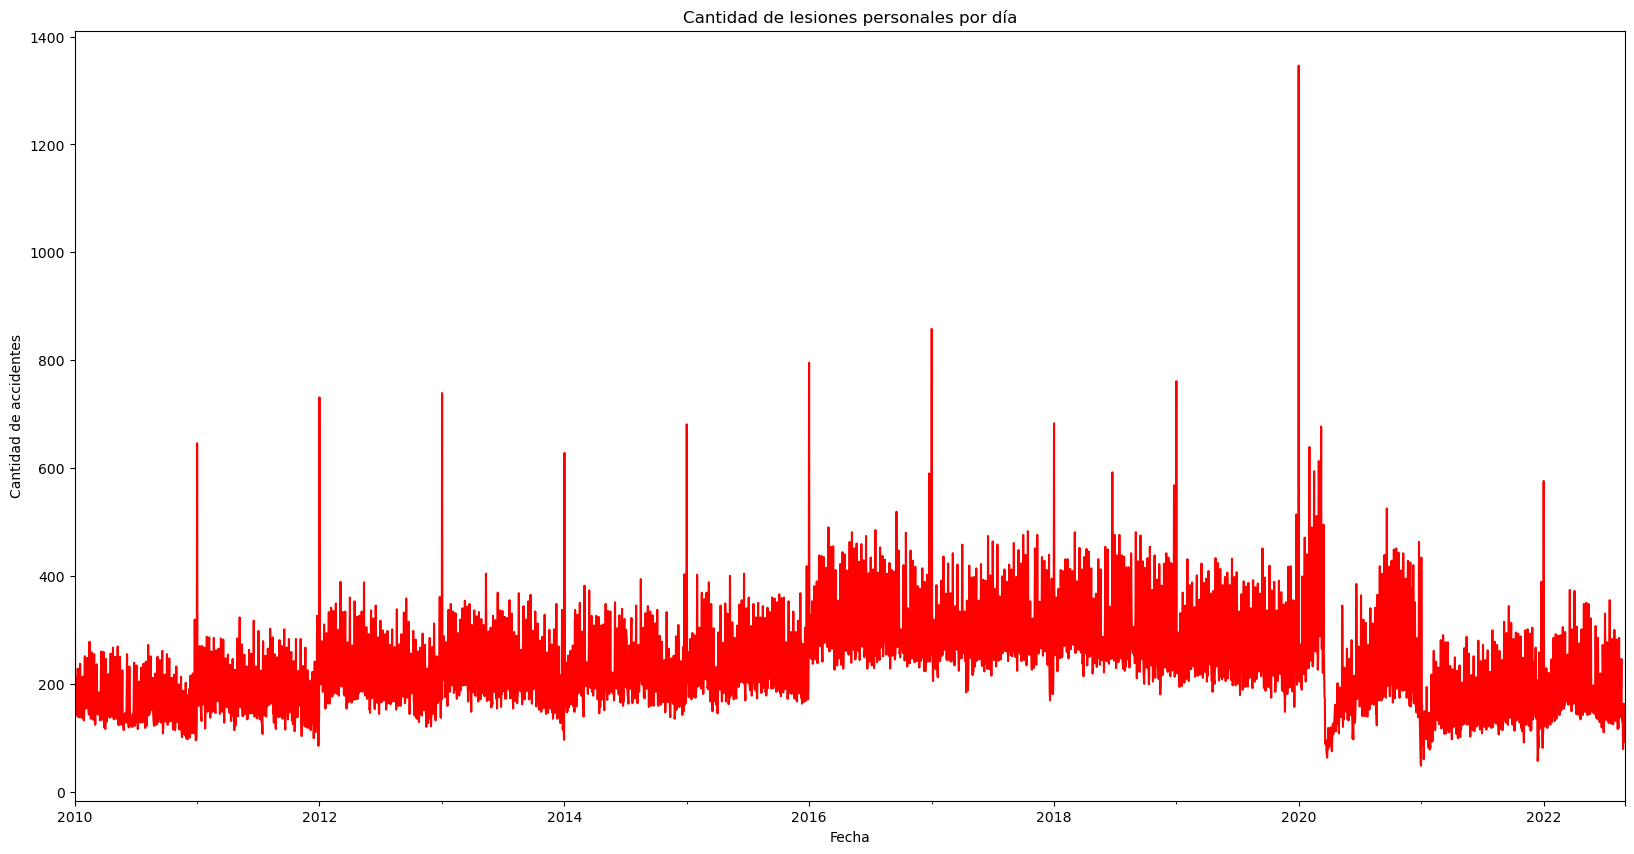

In [9]:
data_cleaned.groupby(by=data_cleaned.index)["CANTIDAD"].count().plot(figsize=(20,10), title="Cantidad de lesiones personales por día", color="red", xlabel="Fecha", ylabel="Cantidad de accidentes");

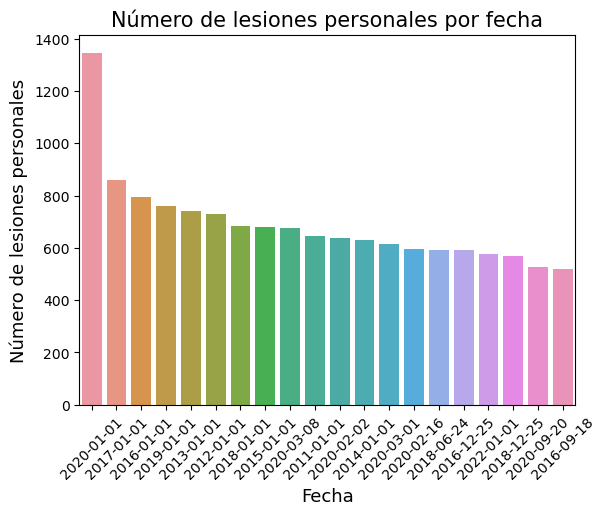

In [10]:
# Como encontramos que en ciertas fechas hay un pico de accidentes, vamos a ver en que fechas se presentan
# Agregamos una columna diciendo el dia de la semana
data_cleaned['DIA SEMANA'] = pd.to_datetime(data_cleaned['FECHA HECHO']).dt.day_name(locale='es_CO.utf8')
# Mostrar las fechas con más delitos
# Creamos un dataframe con la cantidad de delitos por fecha
data_df = pd.DataFrame(data_cleaned.groupby(by=data_cleaned.index)["CANTIDAD"].count())
data_df.index = data_df.index.date
data_df
#plot = data_df.sort_values(by="ARMAS MEDIOS", ascending=False).head(10).plot(kind="bar", figsize=(20,10), fontsize=13, rot=45, xlabel="Fecha", ylabel="Número de lesiones personales", title="Número de lesiones personales por fecha").legend(["Heridos"])
# Limitamos el resultado a las 10 fechas con más accidentes, ordenadas de mayor a menor y mostramos el gráfico
sns.barplot(x=data_df.index, y=data_df["CANTIDAD"], data=data_df, order=data_df.sort_values(by="CANTIDAD", ascending=False).head(20).index)
sns.set(rc={'figure.figsize':(20,15)})
plt.xlabel("Fecha", fontsize=13)
plt.ylabel("Número de lesiones personales", fontsize=13)
plt.title("Número de lesiones personales por fecha", fontsize=15)
plt.xticks(rotation=45);

In [11]:
data_cleaned

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,DIA SEMANA
FECHA HECHO,,,,,,,,
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,MUTATÁ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,NECOCLÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
...,...,...,...,...,...,...,...,...
2022-05-03,CESAR,VALLEDUPAR (CT),VENENO,2022-05-03,ADULTOS,LESIONES PERSONALES,1,Martes
2022-06-16,HUILA,OPORAPA,VENENO,2022-06-16,ADOLESCENTES,LESIONES PERSONALES,1,Jueves
2022-04-17,TOLIMA,IBAGUÉ (CT),VENENO,2022-04-17,ADULTOS,LESIONES PERSONALES,1,Domingo


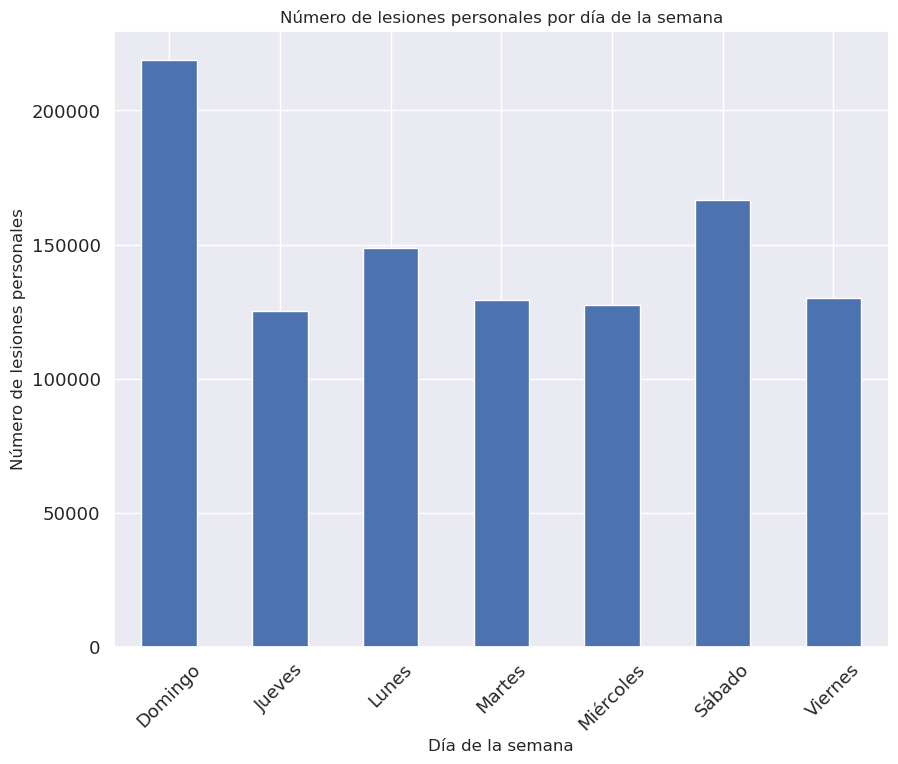

In [12]:
# Vamos a ver en que días de la semana se presentan más accidentes
data_cleaned.groupby(by=data_cleaned['DIA SEMANA'])["CANTIDAD"].count().plot(kind="bar", figsize=(10,8), fontsize=13, rot=45, xlabel="Día de la semana", ylabel="Número de lesiones personales", title="Número de lesiones personales por día de la semana");

In [13]:
# Mostramos cuantas de estas lesiones son por accidentes de tránsito o por lesiones personales
data_cleaned.groupby(by='DESCRIPCIÓN CONDUCTA')['ARMAS MEDIOS'].count()

DESCRIPCIÓN CONDUCTA
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )    298705
LESIONES PERSONALES                               747580
Name: ARMAS MEDIOS, dtype: int64

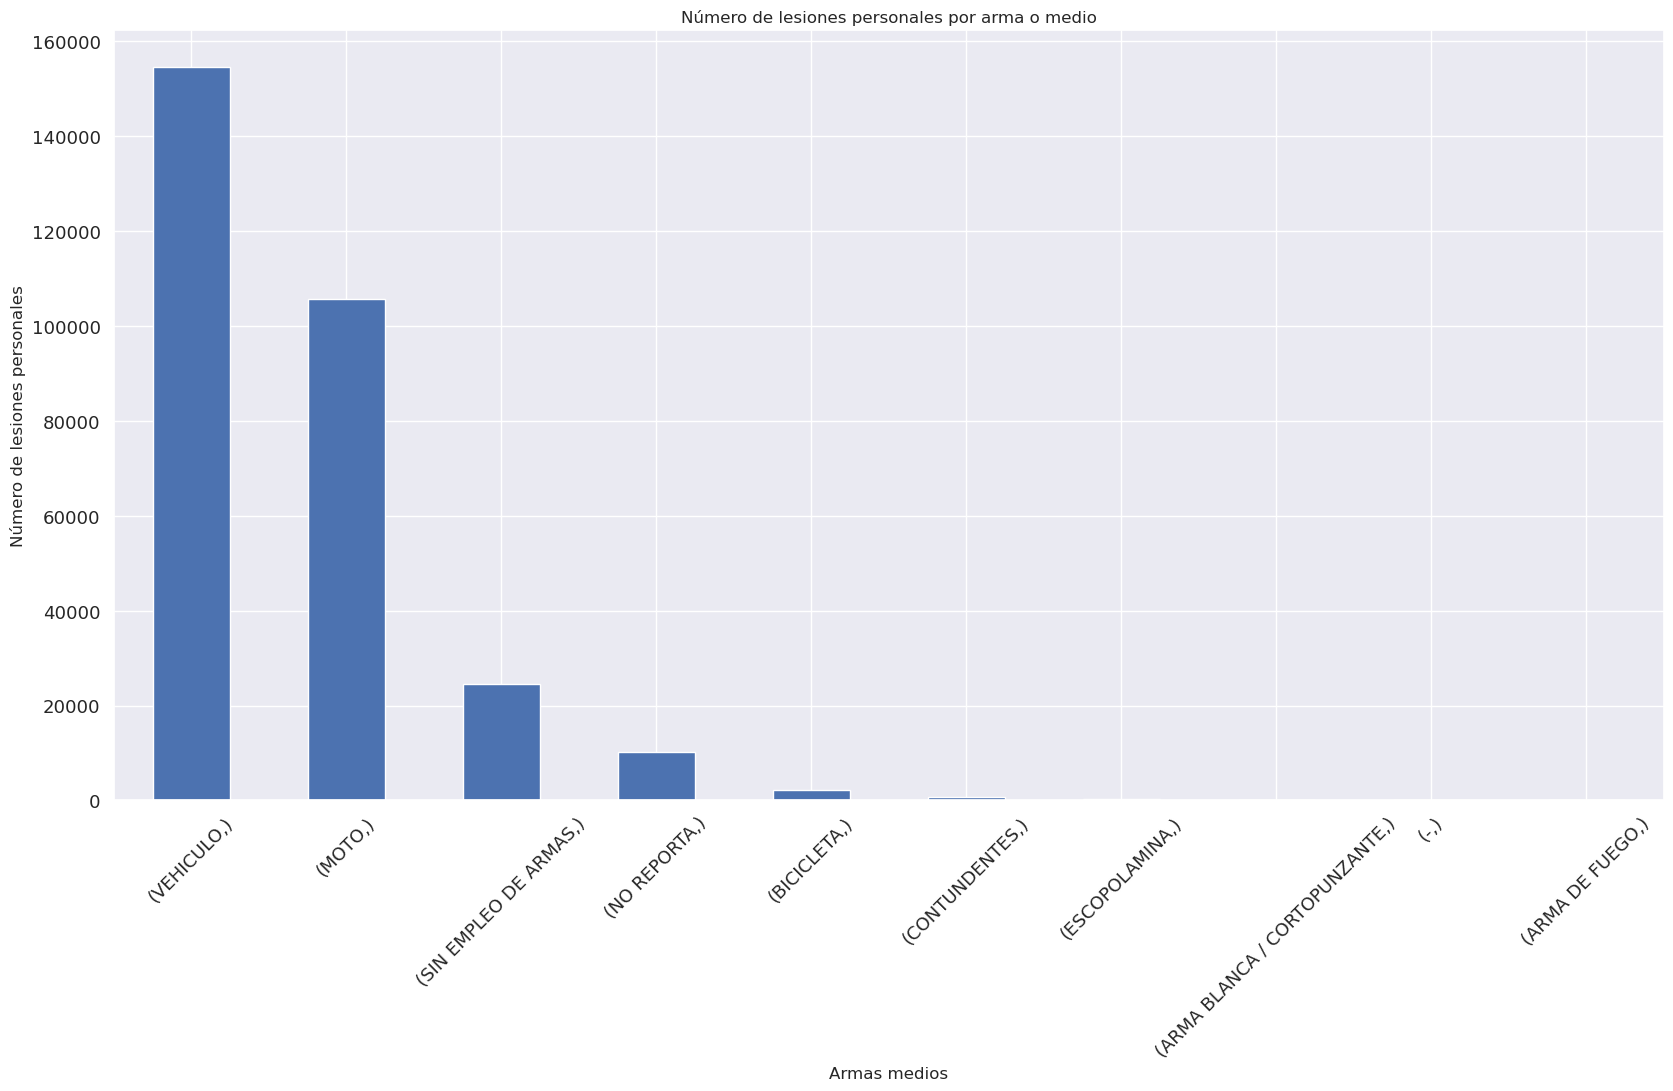

In [14]:
# Graficamos el número que se da por lesiones culposas o por accidente de tránsito
data_cleaned[data_cleaned["DESCRIPCIÓN CONDUCTA"] == "LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )"][["ARMAS MEDIOS"]].value_counts().plot(kind="bar", figsize=(20,10), fontsize=13, rot=45, xlabel="Armas medios", ylabel="Número de lesiones personales", title="Número de lesiones personales por arma o medio");

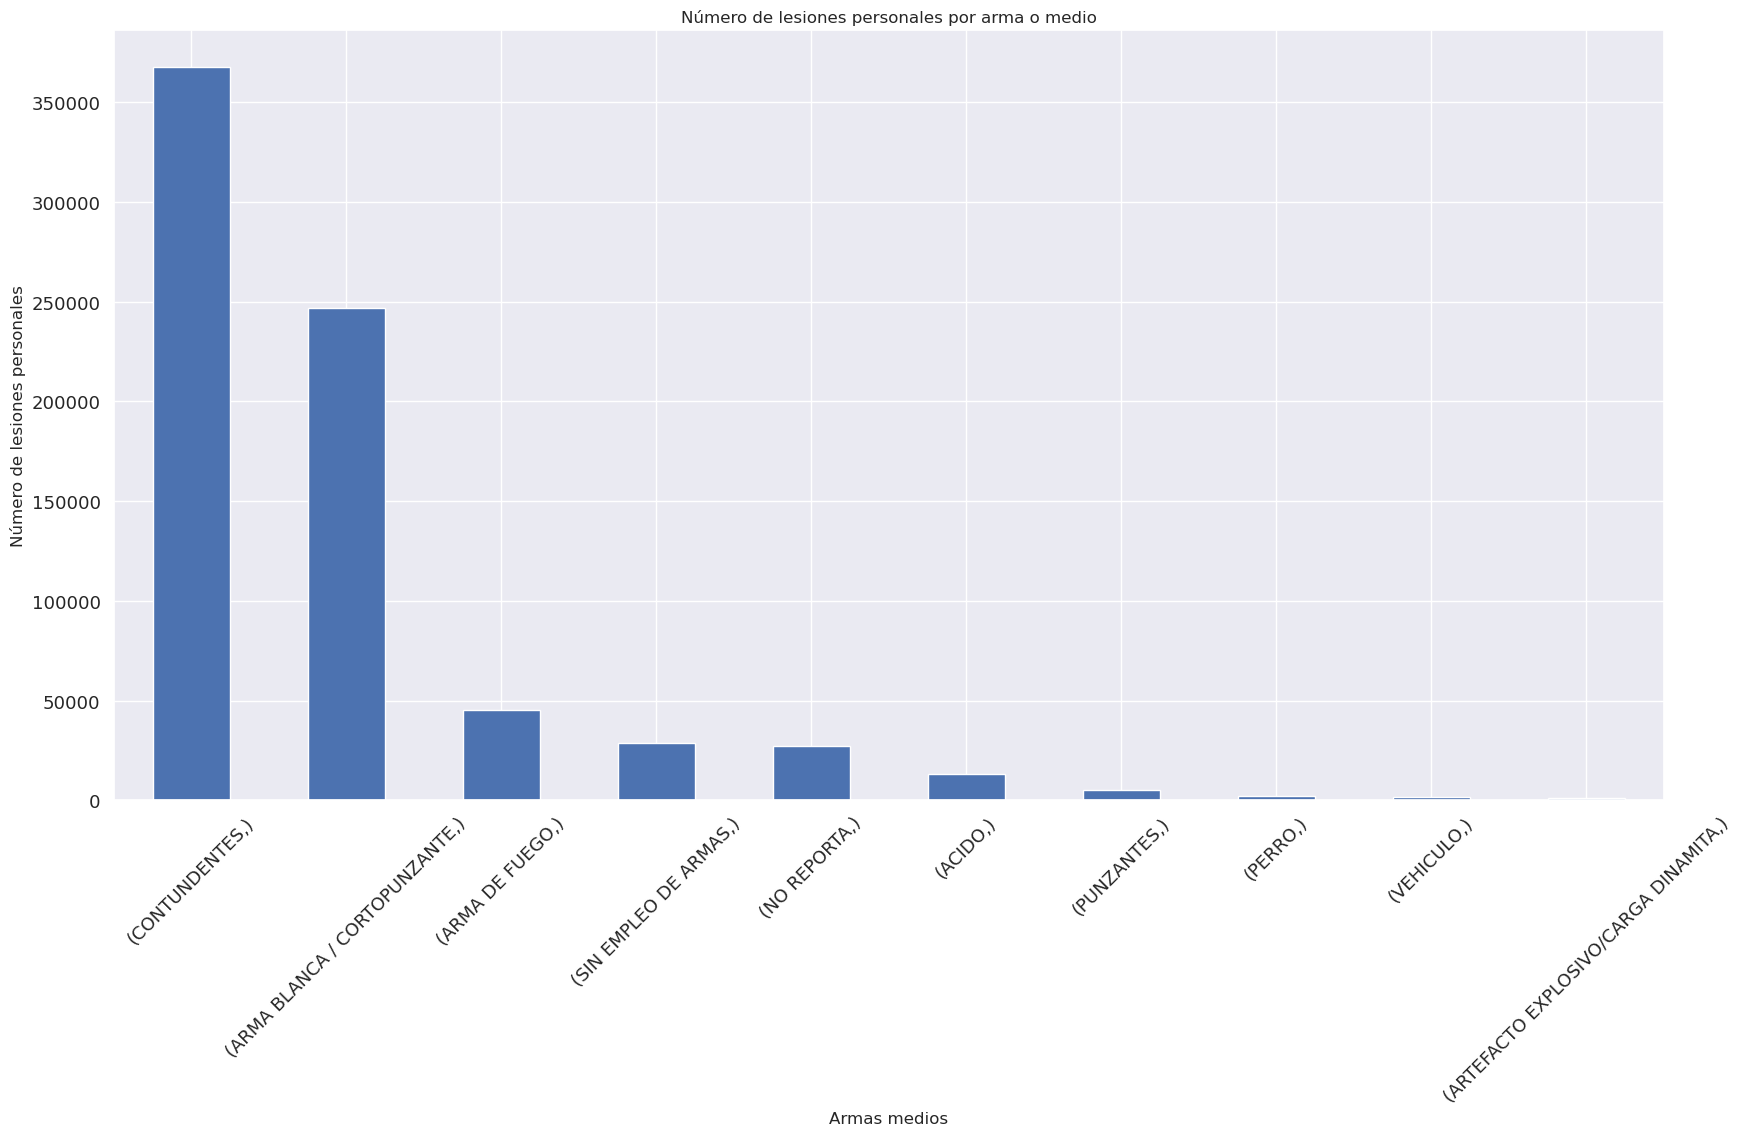

In [15]:
# Graficamos el número que se da por lesiones personales, pero debido a que hay muchos datos de este tipo, vamos a limitar el resultado a los 10 más comunes
data_cleaned[data_cleaned["DESCRIPCIÓN CONDUCTA"] == "LESIONES PERSONALES"][["ARMAS MEDIOS"]].value_counts().head(10).plot(kind="bar", figsize=(20,10), fontsize=13, rot=45, xlabel="Armas medios", ylabel="Número de lesiones personales", title="Número de lesiones personales por arma o medio");

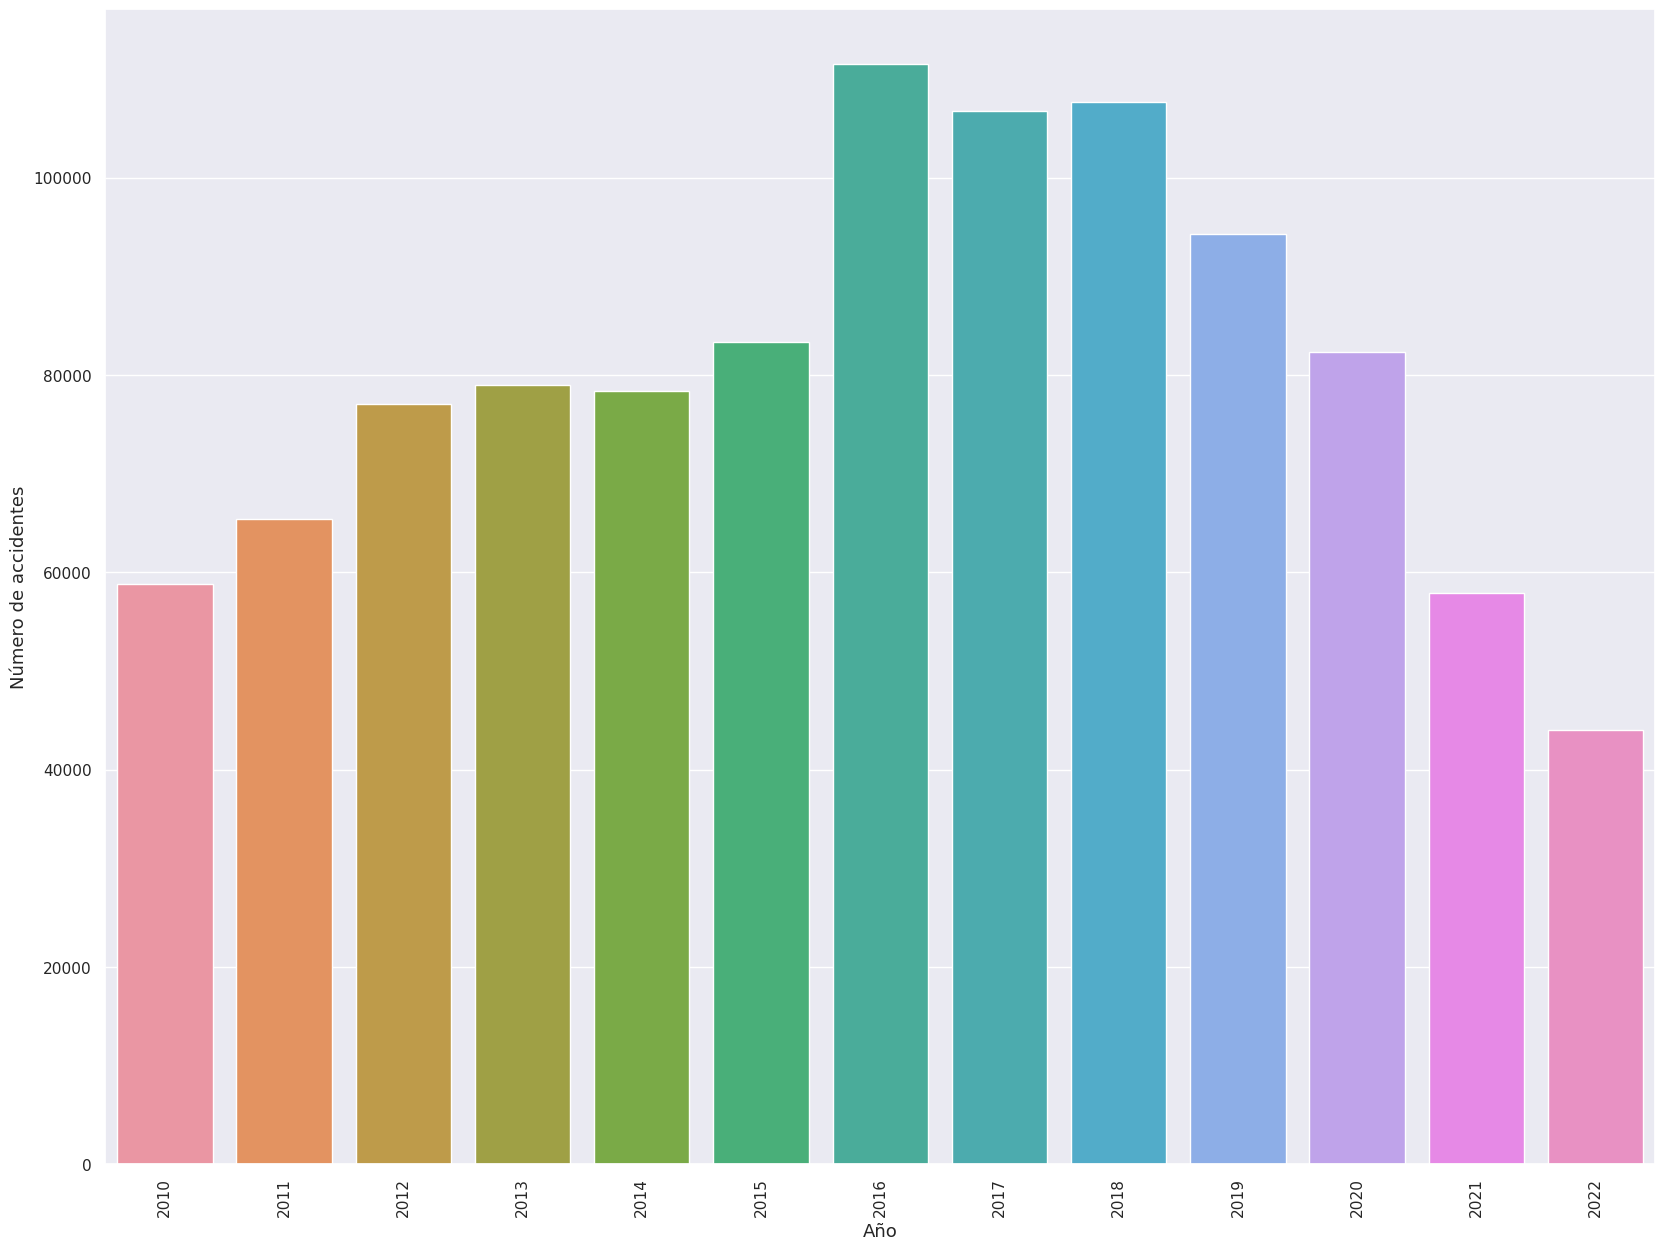

In [16]:
# Vamos a ver la distribución de los datos por año
# Para ello, vamos a crear una tabla de frecuencias
# Primero, vamos a crear una tabla de frecuencias de la variable FECHA HECHO, pero solamente para el año
data_cleaned["FECHA HECHO"].dt.year.value_counts()
# Hacemos un gráfico de barras
sns.countplot(x=data_cleaned["FECHA HECHO"].dt.year)
plt.xlabel("Año", fontsize=13)
plt.ylabel("Número de accidentes", fontsize=13)
plt.xticks(rotation=90)
plt.show()

Con este grafico podemos ver que la mayoria de las lesiones ocurrieron en el año 2016, con esto tomaremos este año para seguir buscando datos

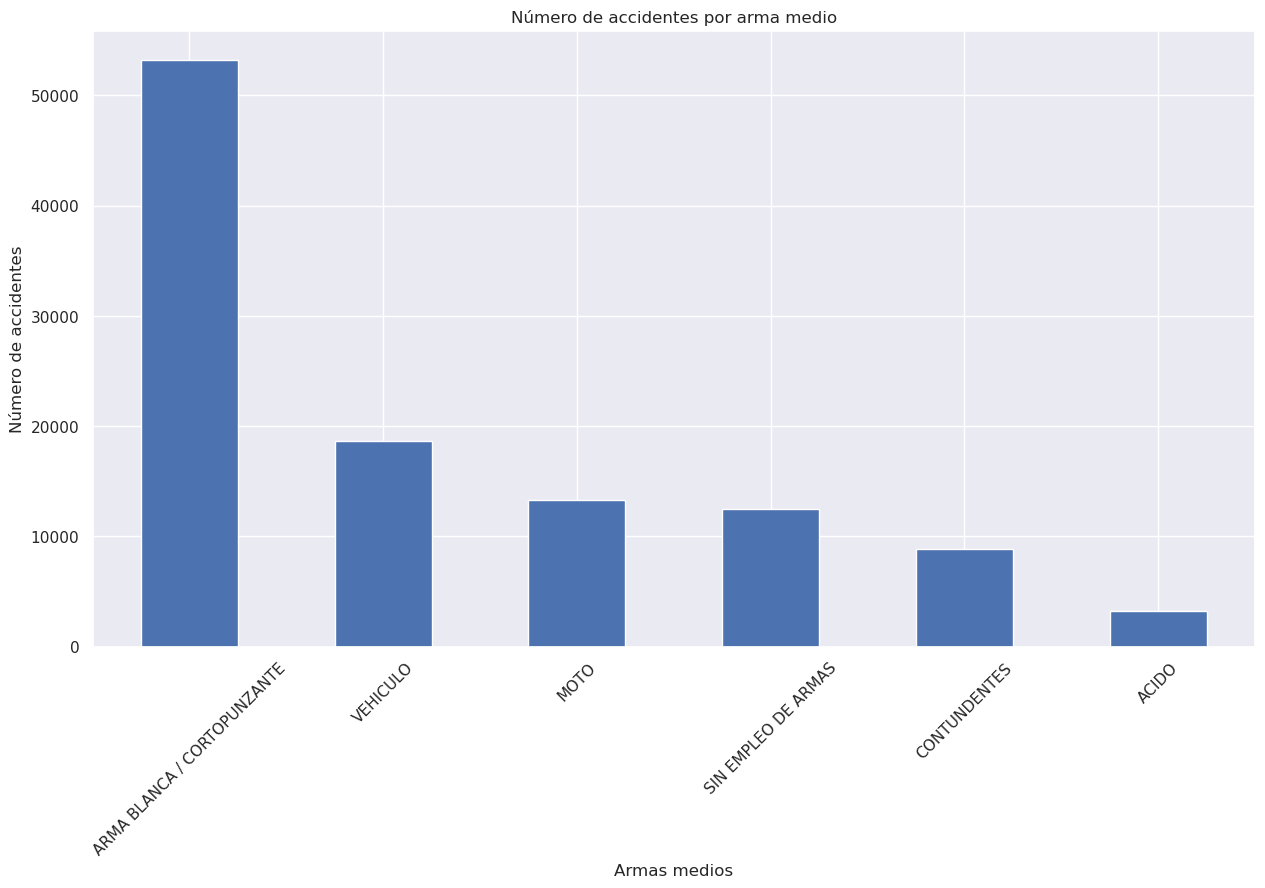

In [17]:
# Filtraremos todos los datos para el año 2016
data_2016 = data_cleaned[data_cleaned["FECHA HECHO"].dt.year == 2016]
# Vamos a ver la distribución de los datos
# Para ello, vamos a crear una tabla de frecuencia de la variable ARMAS MEDIOS
# Debido a que hay muchas categorías y no todas tienen muchos datos, vamos a mostrar las 6 categorías con más datos
data_2016["ARMAS MEDIOS"].value_counts().head(6).plot(kind="bar", xlabel="Armas medios", ylabel="Número de accidentes", title="Número de accidentes por arma medio", figsize=(15,8), rot=45);

Con esto podemos ver que la mayoria de las lesiones que ocurrieron en el año 2016 fueron por arma blanca / cortopunzante

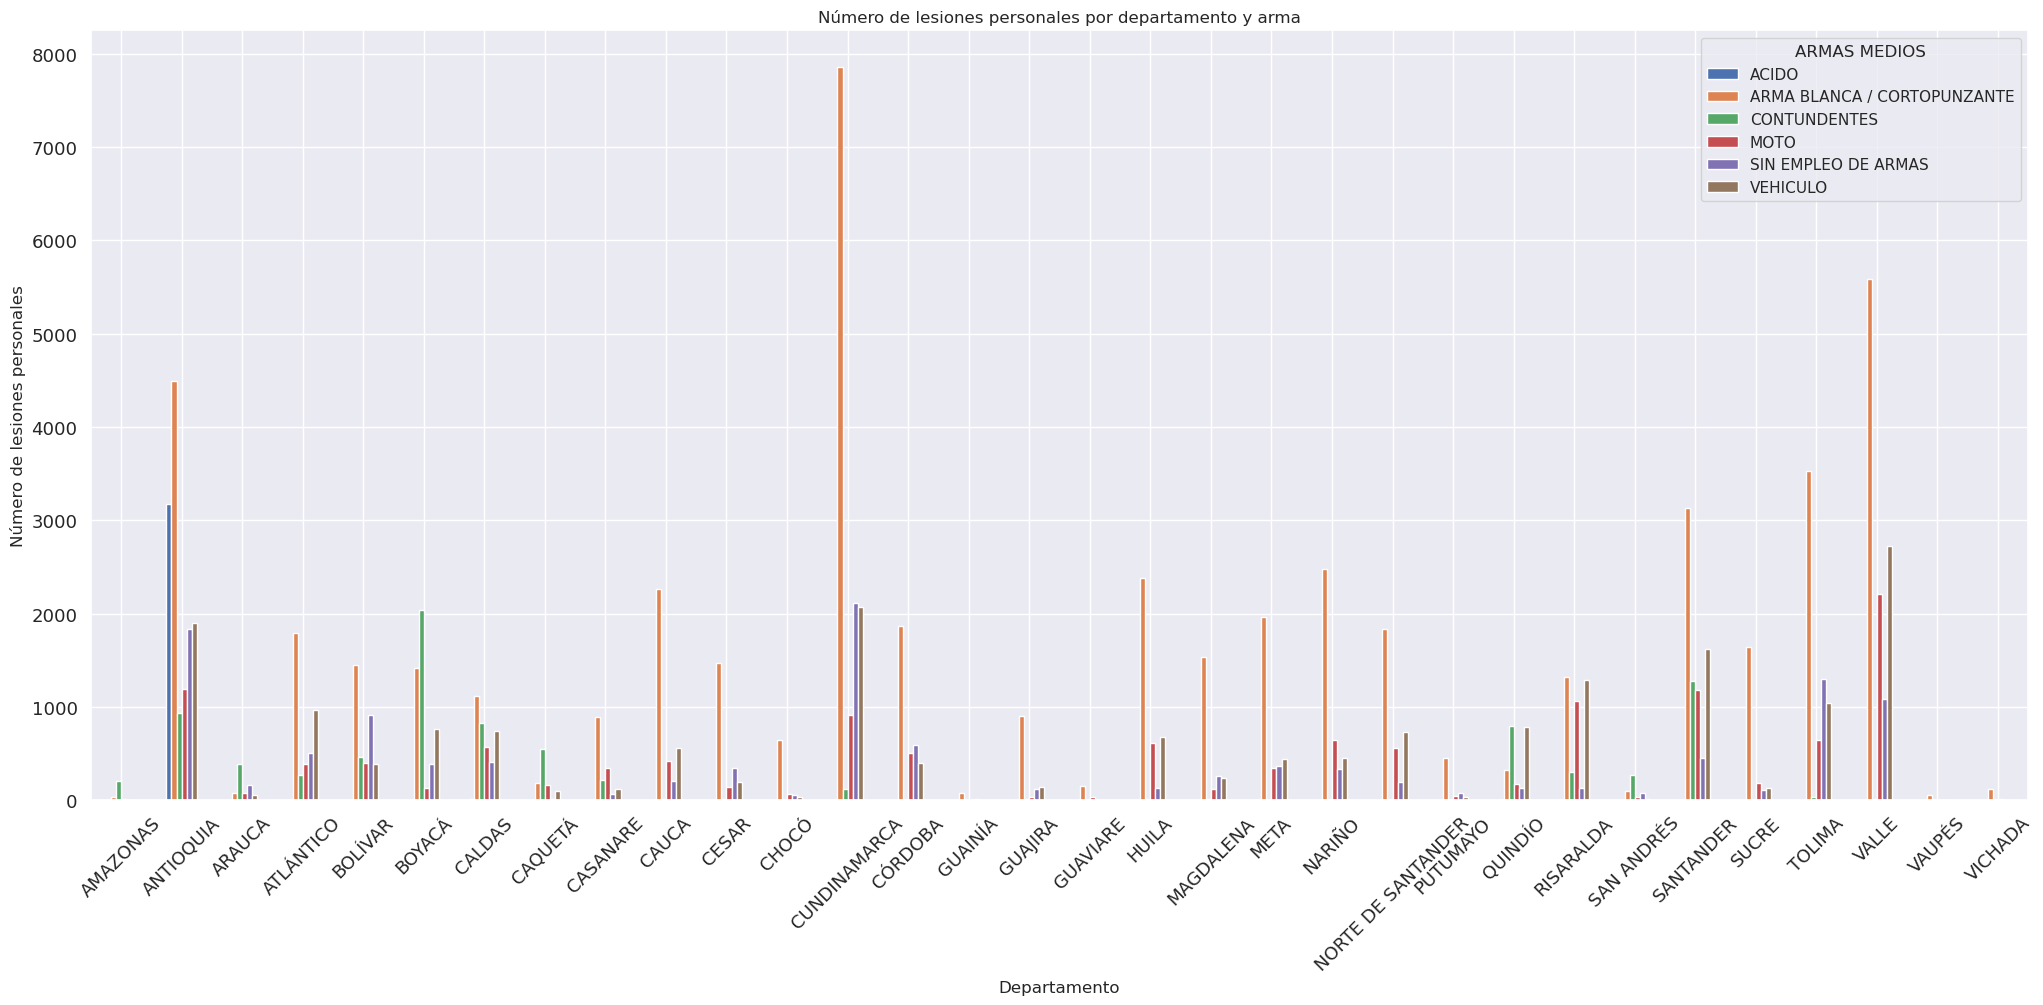

In [18]:
# Filtraremos por Departamento y ARMAS MEDIOS para ver la distribución de los datos
data_2016_weapons = data_2016[data_2016["ARMAS MEDIOS"].isin(data_2016["ARMAS MEDIOS"].value_counts().head(6).index)]

# Con estos datos mostramos la distribución de los datos por departamento, incluyendo las 6 categorías de lesiones personales más comunes
data_2016_weapons_countries = data_2016_weapons[data_2016_weapons["DEPARTAMENTO"].isin(data_2016_weapons["DEPARTAMENTO"].value_counts().index)]
data_plotted = data_2016_weapons_countries.groupby(["DEPARTAMENTO", "ARMAS MEDIOS"]).size().sort_values(ascending=False)
data_plotted.unstack().plot(kind="bar", stacked=False, figsize=(25,10), fontsize=13, rot=45, xlabel="Departamento", ylabel="Número de lesiones personales", title="Número de lesiones personales por departamento y arma").legend;
# sns.catplot(x="DEPARTAMENTO", data=data_2016_weapons, kind="count", hue="ARMAS MEDIOS")


In [19]:
# Ignorar esta celda
data_example = data_2016.groupby(["ARMAS MEDIOS"]).size().sort_values(ascending=False)
(data_example / data_example.sum()) * 100
data_example.index.to_list()

['ARMA BLANCA / CORTOPUNZANTE',
 'VEHICULO',
 'MOTO',
 'SIN EMPLEO DE ARMAS',
 'CONTUNDENTES',
 'ACIDO',
 'NO REPORTA',
 'ARMA DE FUEGO',
 'BICICLETA',
 'ESCOPOLAMINA',
 'DIRECTA',
 'PERRO',
 'PUNZANTES',
 'COMBUSTIBLE',
 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA',
 'GRANADA DE MANO',
 'AGUA CALIENTE',
 'MINA ANTIPERSONA',
 'ARMAS BLANCAS',
 'MEDICAMENTOS',
 'SUSTANCIAS TOXICAS',
 'GASES',
 'CUCHILLA',
 'CINTAS/CINTURON',
 'POLVORA(FUEGOS PIROTECNICOS)',
 'CARRO BOMBA',
 'ARTEFACTO INCENDIARIO',
 'PAPA EXPLOSIVA',
 'ALUCINOGENOS',
 'JERINGA']

Con este grafico podemos ver que la mayoria de las lesiones que ocurrieron en el año 2016 ocurrieron en Antioquia, seguido de Cundinamarca y Valle del Cauca.
Siendo las tres principales causas en estas regiones:
- Arma blanca / cortopunzante
- Vehiculo
- Sin empleo de armas
- Moto

In [20]:
# Mostrar las fechas con mas casos de lesiones personales junto con el arma medio usado
data_2016.groupby(by=data_2016.index)[["ARMAS MEDIOS"]].count().sort_values(by="ARMAS MEDIOS", ascending=False).head(10)
# Mostrar valores para cada arma medio
data_2016.groupby(by=data_2016.index)[["ARMAS MEDIOS"]].value_counts().sort_values(ascending=False)

FECHA HECHO  ARMAS MEDIOS                
2016-01-01   ARMA BLANCA / CORTOPUNZANTE     455
2016-12-25   ARMA BLANCA / CORTOPUNZANTE     320
2016-09-18   ARMA BLANCA / CORTOPUNZANTE     290
2016-05-08   ARMA BLANCA / CORTOPUNZANTE     274
2016-02-28   ARMA BLANCA / CORTOPUNZANTE     263
                                            ... 
2016-10-04   COMBUSTIBLE                       1
2016-05-15   ARMAS BLANCAS                     1
             ARMA DE FUEGO                     1
2016-10-05   NO REPORTA                        1
2016-12-31   POLVORA(FUEGOS PIROTECNICOS)      1
Length: 3114, dtype: int64

In [21]:
# Mostrar las fechas con mas casos de lesiones personales junto con el arma medio usado
data_2016.groupby(by=data_2016.index)[["DIA SEMANA"]].count().sort_values(by="DIA SEMANA", ascending=False).head(10)
# Mostrar valores para cada arma medio
data_2016.groupby(by=data_2016.index)[["DIA SEMANA"]].value_counts().sort_values(ascending=False)

FECHA HECHO  DIA SEMANA
2016-01-01   Viernes       795
2016-12-25   Domingo       590
2016-09-18   Domingo       519
2016-02-28   Domingo       490
2016-07-17   Domingo       485
                          ... 
2016-08-30   Martes        228
2016-06-23   Jueves        228
2016-03-17   Jueves        226
2016-12-09   Viernes       224
2016-12-13   Martes        223
Length: 366, dtype: int64

In [22]:
data_cleaned.duplicated().sum()

106852

In [23]:
xs =data_cleaned['DEPARTAMENTO']== 'CÓRDOBA'

In [24]:
xs.sum()

24926

In [25]:
xs.duplicated

<bound method Series.duplicated of FECHA HECHO
2010-01-01    False
2010-01-01    False
2010-01-01    False
2010-01-01    False
2010-01-01    False
              ...  
2022-05-03    False
2022-06-16    False
2022-04-17    False
2022-03-30    False
2022-06-10    False
Name: DEPARTAMENTO, Length: 1046285, dtype: bool>

In [26]:
xs.sum()

24926

In [27]:
dfs= [data_cleaned['FECHA HECHO'], data_cleaned['CANTIDAD']]

In [28]:
dfs[1]

FECHA HECHO
2010-01-01    2
2010-01-01    1
2010-01-01    1
2010-01-01    1
2010-01-01    2
             ..
2022-05-03    1
2022-06-16    1
2022-04-17    1
2022-03-30    1
2022-06-10    1
Name: CANTIDAD, Length: 1046285, dtype: int64

In [29]:
# dejamos los datos hasta 2019
data_2019 = data_cleaned[data_cleaned["FECHA HECHO"].dt.year < 2020]
data_2019
data_2019["FECHA HECHO"].dt.year.value_counts()

2016    111494
2018    107666
2017    106706
2019     94325
2015     83303
2013     78986
2014     78388
2012     77034
2011     65410
2010     58790
Name: FECHA HECHO, dtype: int64

In [30]:
data_2019.to_csv('hola.cvs')

In [31]:
#dejamos sto_csvolo el mes de enero
data_2019ene = data_2019[data_2019["FECHA HECHO"].dt.month < 2]
data_2019ene["FECHA HECHO"].dt.year.value_counts()

2016    9501
2018    9274
2017    9160
2019    8129
2013    7508
2012    7309
2015    6970
2011    6324
2014    6269
2010    5633
Name: FECHA HECHO, dtype: int64

In [32]:
data_2019ene

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,DIA SEMANA
FECHA HECHO,,,,,,,,
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,MUTATÁ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,NECOCLÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
...,...,...,...,...,...,...,...,...
2019-01-31,VALLE,CANDELARIA,VEHICULO,2019-01-31,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,Jueves
2019-01-31,VALLE,PALMIRA,VEHICULO,2019-01-31,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,Jueves
2019-01-31,VALLE,TULUÁ,VEHICULO,2019-01-31,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,Jueves


In [33]:
data_20['CANTIDAD'].sum()

NameError: name 'data_20' is not defined

In [ ]:
c = data_20.groupby(by=data_20.index)[["FECHA HECHO"]].value_counts()
c.head(22)

FECHA HECHO  FECHA HECHO
2010-01-01   2010-01-01     506
2010-01-02   2010-01-02     202
2010-01-03   2010-01-03     212
2010-01-04   2010-01-04     177
2010-01-05   2010-01-05     141
2010-01-06   2010-01-06     150
2010-01-07   2010-01-07     142
2010-01-08   2010-01-08     161
2010-01-09   2010-01-09     200
2010-01-10   2010-01-10     228
2010-01-11   2010-01-11     166
2010-01-12   2010-01-12     138
2010-01-13   2010-01-13     148
2010-01-14   2010-01-14     138
2010-01-15   2010-01-15     146
2010-01-16   2010-01-16     196
2010-01-17   2010-01-17     237
2010-01-18   2010-01-18     180
2010-01-19   2010-01-19     157
2010-01-20   2010-01-20     164
2010-01-21   2010-01-21     137
2010-01-22   2010-01-22     159
dtype: int64

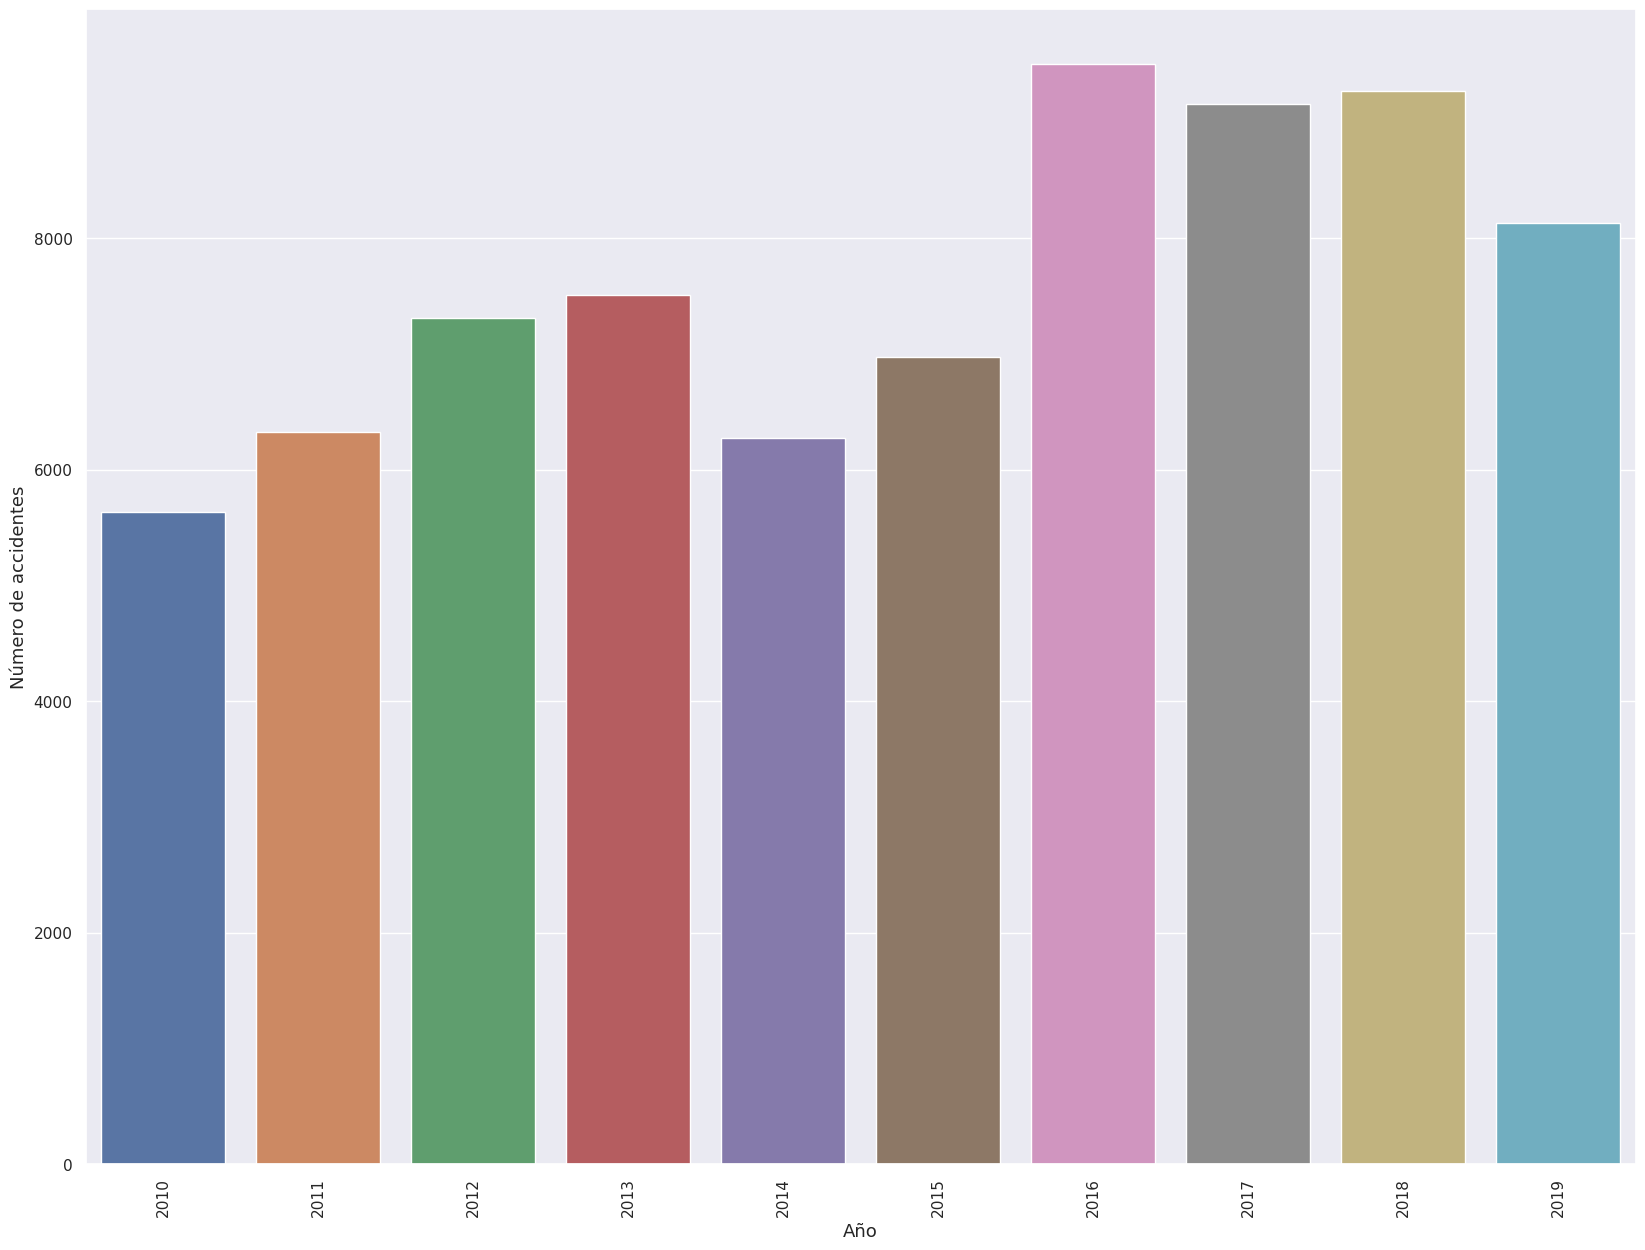

In [34]:
# Vamos a ver la distribución de los datos por año
# Para ello, vamos a crear una tabla de frecuencias
# Primero, vamos a crear una tabla de frecuencias de la variable FECHA HECHO, pero solamente para el año
data_2019ene["FECHA HECHO"].dt.year.value_counts()
# Hacemos un gráfico de barras
sns.countplot(x=data_2019ene["FECHA HECHO"].dt.year)
plt.xlabel("Año", fontsize=13)
plt.ylabel("Número de accidentes", fontsize=13)
plt.xticks(rotation=90)
plt.show()

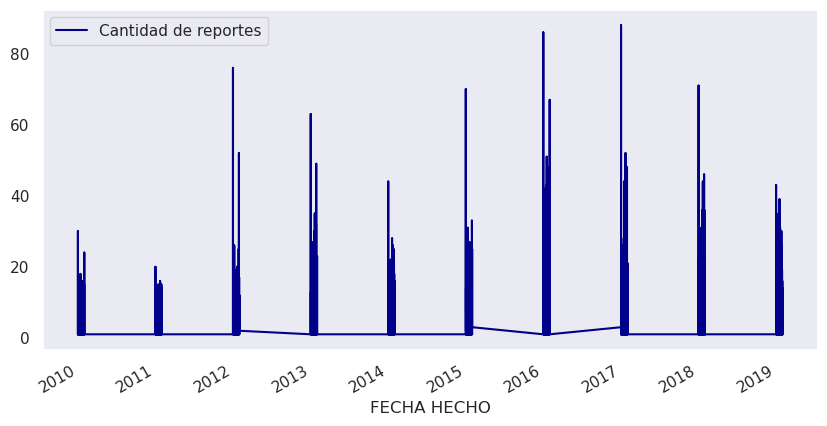

In [35]:
fig, ax=plt.subplots(figsize=(10, 5))
data_2019ene['CANTIDAD'].plot(ax=ax, label='Cantidad de reportes',color = 'darkblue')
plt.grid()
ax.legend();

In [36]:
'''### AQUI LOS MODELOS DE PREDICCION
import numpy as np
import pandas as pd

from sklearn import metrics
from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import time
import itertools
import warnings
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")'''

'### AQUI LOS MODELOS DE PREDICCION\nimport numpy as np\nimport pandas as pd\n\nfrom sklearn import metrics\nfrom math import sqrt\n\nimport matplotlib\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nimport time\nimport itertools\nimport warnings\nimport statsmodels.api as sm\n\nfrom statsmodels.tsa.stattools import adfuller\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\nfrom statsmodels.tsa.seasonal import seasonal_decompose\nfrom statsmodels.tsa.arima_model import ARIMA\n\nwarnings.filterwarnings("ignore")'

In [37]:
data_2019ene

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,DIA SEMANA
FECHA HECHO,,,,,,,,
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,MUTATÁ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,NECOCLÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
...,...,...,...,...,...,...,...,...
2019-01-31,VALLE,CANDELARIA,VEHICULO,2019-01-31,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,Jueves
2019-01-31,VALLE,PALMIRA,VEHICULO,2019-01-31,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,Jueves
2019-01-31,VALLE,TULUÁ,VEHICULO,2019-01-31,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1,Jueves


In [38]:
data_p2019 = data_2019.groupby(by=data_2019.index)[["FECHA HECHO"]].value_counts()
data_p2019.head(22)

FECHA HECHO  FECHA HECHO
2010-01-01   2010-01-01     506
2010-01-02   2010-01-02     202
2010-01-03   2010-01-03     212
2010-01-04   2010-01-04     177
2010-01-05   2010-01-05     141
2010-01-06   2010-01-06     150
2010-01-07   2010-01-07     142
2010-01-08   2010-01-08     161
2010-01-09   2010-01-09     200
2010-01-10   2010-01-10     228
2010-01-11   2010-01-11     166
2010-01-12   2010-01-12     138
2010-01-13   2010-01-13     148
2010-01-14   2010-01-14     138
2010-01-15   2010-01-15     146
2010-01-16   2010-01-16     196
2010-01-17   2010-01-17     237
2010-01-18   2010-01-18     180
2010-01-19   2010-01-19     157
2010-01-20   2010-01-20     164
2010-01-21   2010-01-21     137
2010-01-22   2010-01-22     159
dtype: int64

In [39]:
data_p2019= data_2019

data_p2019.columns = ['DEPARTAMENTO',	'MUNICIPIO',	'ARMAS MEDIOS',	'ds',	'GRUPO ETARIO',	'DESCRIPCIÓN CONDUCTA',	'y',	'DIA SEMANA']

In [40]:
data_prueba= data_p2019.drop(['DEPARTAMENTO', 'MUNICIPIO','ARMAS MEDIOS', 'GRUPO ETARIO','DESCRIPCIÓN CONDUCTA', 'DIA SEMANA'], axis=1)

In [41]:
data_prueba

,ds,y
FECHA HECHO,,
2010-01-01,2010-01-01,2
2010-01-01,2010-01-01,1
2010-01-01,2010-01-01,1
2010-01-01,2010-01-01,1
2010-01-01,2010-01-01,2
...,...,...
2019-12-31,2019-12-31,1
2019-12-31,2019-12-31,1
2019-12-31,2019-12-31,1


In [42]:
import pandas as pd
from prophet import Prophet


In [43]:
'''# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()'''

"# Python\ndf = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')\ndf.head()"

In [44]:
# Python
m = Prophet()
m.fit(data_prueba)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -171.63
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.

      99   2.96531e+06   7.17934e-05       14315.3           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199   2.96537e+06   3.29233e-05       30489.4      0.3131      0.3131      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299    2.9654e+06   3.68352e-05       15937.3           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340   2.96541e+06   1.45483e-05        4121.7           1           1      393   
Optimization terminated normally: 
  Convergence detected: relative gradient mag

In [45]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4012,2020-12-26
4013,2020-12-27
4014,2020-12-28
4015,2020-12-29
4016,2020-12-30


In [46]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
4012,2020-12-26,1.631190,-1.249557,4.389700
4013,2020-12-27,1.697650,-1.293379,4.674829
4014,2020-12-28,1.544698,-1.359155,4.408439
4015,2020-12-29,1.557598,-1.230738,4.633629
4016,2020-12-30,1.559876,-1.283245,4.432871


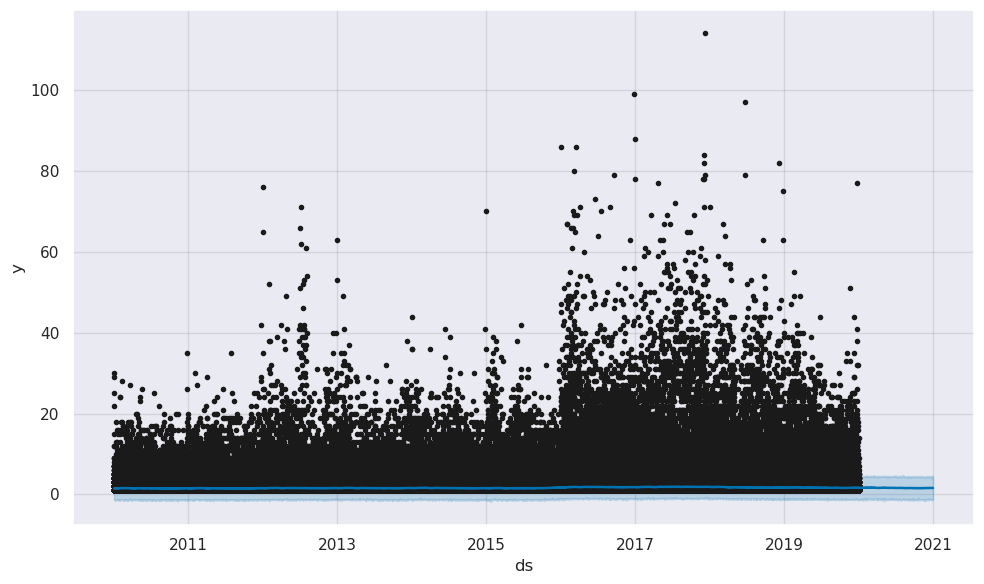

In [47]:
# Python
fig1 = m.plot(forecast)


/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


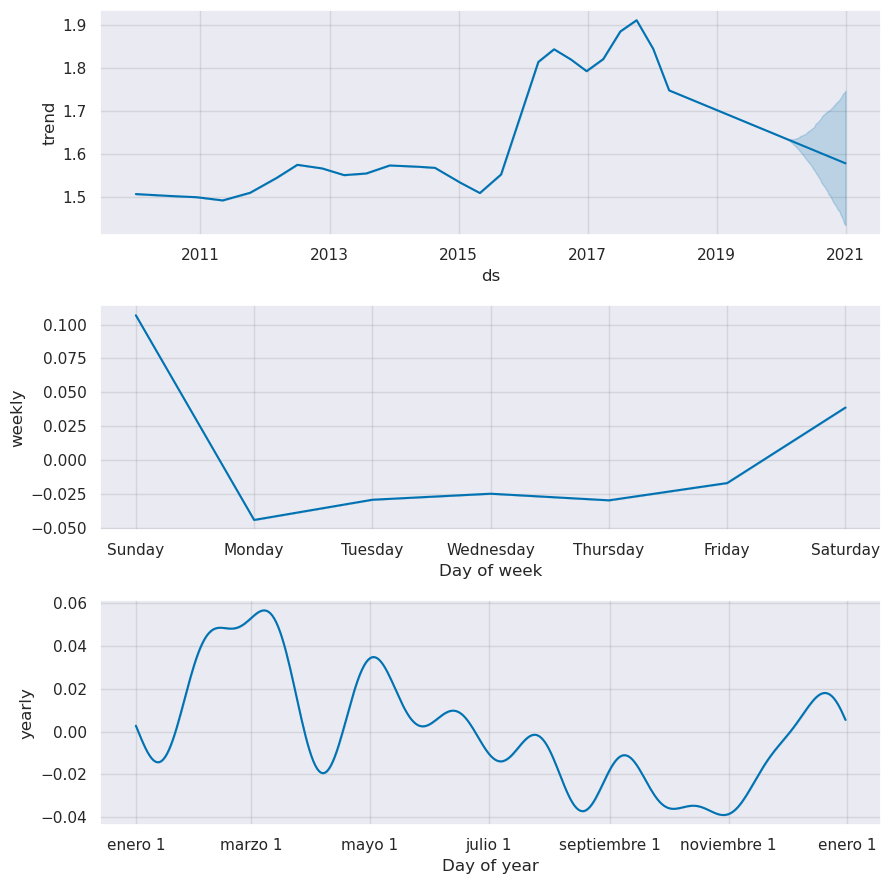

In [48]:
# Python
fig2 = m.plot_components(forecast)


In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

#plot_plotly(m, forecast)

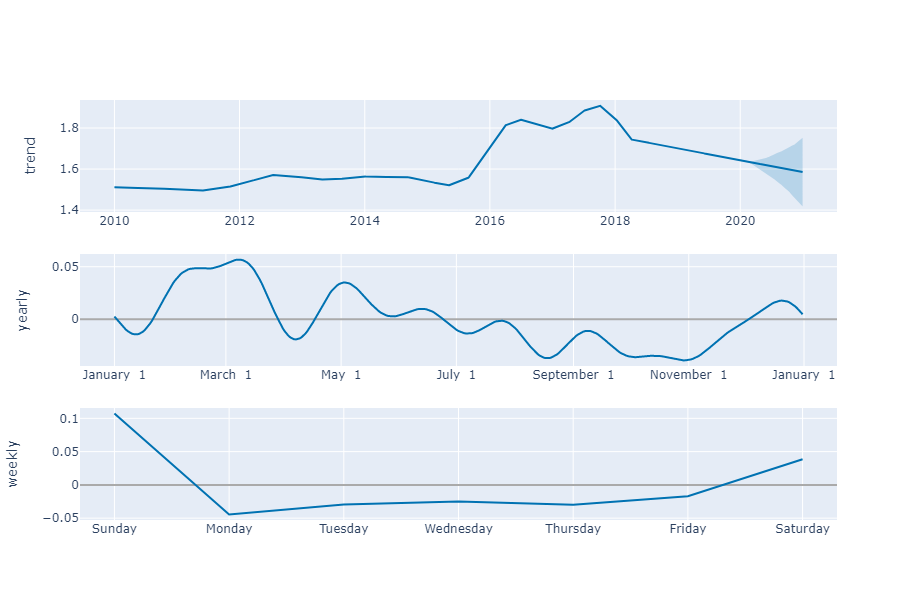

In [ ]:
# Python
plot_components_plotly(m, forecast)


In [53]:
future.dtypes
future

,ds
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05
...,...
4012,2020-12-26
4013,2020-12-27
4014,2020-12-28
4015,2020-12-29


In [50]:
import joblib


joblib.dump(m, 'model.pkl')

['model.pkl']

In [55]:
# Usar el modelo para hacer predicciones
fecha = '2021-01-01'

/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
